# Three Lump Model 

## File name: param_estim_3lump.py

Author: Kalen S. Gabel

Date Due: Oct. 21st, 2020

The purpose of this function is to estimate parameters for a dynamic 3 lump model of a Fluid Catalytic Cracker.


# Equations 

$$ \frac{dy_1}{dt} = -(k_1 + k_3)y_1^2 $$ 
$$ \frac{dy_2}{dt} = -k_1y_1^2 - k_2y_2 $$
$$ \frac{dy_3}{dt} = k_3y_1^2 + k_2y_2 $$

### Packages

In [17]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Data

In [18]:

xaxisData = np.array([0.01667, 0.03333, 0.05, 0.1])
yaxisData = np.array([[0.5074, 0.3796, 0.2882, 0.1762], [0.3767, 0.4385, 0.4865, 0.5416],
                      [.1159, 0.1819, 0.2253, 0.2822]])

### Parameter Guesses

In [19]:
k1guess = 1.0
k2guess = 1.0
k3guess = 1.0
parameterguesses = np.array([k1guess, k2guess, k3guess])

### Defining the system of ODE's

In [20]:
def system_of_ODEs(y, t, parameters):  # yvar, xvar, args
    # unpack the parameters
    k1 = parameters[0]
    k2 = parameters[1]
    k3 = parameters[2]
    # unpack the dependent variables
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    dy1dt = -(k1 + k3) * y1 ** 2
    dy2dt = k1 * y1 ** 2 - k2 * y2
    dy3dt = k3 * y1 ** 2 + k2 * y2

    return dy1dt, dy2dt, dy3dt

### Defining the model

In [21]:
def model(xaxisData, *params):
    yaxis0 = np.array([1.0, 0.0, 0.0])  
    numYaxisVariables = 3
    yaxisCalc = np.zeros((xaxisData.size, numYaxisVariables))

    for i in np.arange(0, len(xaxisData)):
        if xaxisData[i] == 0.0:
            yaxisCalc[i, :] = yaxis0
        else:
            xaxisSpan = np.linspace(0.0, xaxisData[i], 101)
            ySoln = odeint(system_of_ODEs, yaxis0, xaxisSpan, args=(params,))
            yaxisCalc[i, :] = ySoln[-1, :]
    yaxisOutput = np.transpose(yaxisCalc)
    yaxisOutput = np.ravel(yaxisOutput)
    return yaxisOutput

### Plotting 

#### First plot

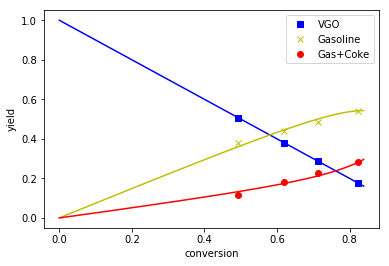

In [22]:
parametersoln, pcov = curve_fit(model, xaxisData, np.ravel(yaxisData), p0=parameterguesses)
xdataConversion = 1 - yaxisData[0, :]
plt.plot(xdataConversion, yaxisData[0, :], 'bs')
plt.plot(xdataConversion, yaxisData[1, :], 'yx')
plt.plot(xdataConversion, yaxisData[2, :], 'ro')
plt.legend(['VGO', 'Gasoline', 'Gas+Coke'])

yaxis0 = np.array([1.0, 0.0, 0.0])
numYaxisVariables = 3

xaxisForPlotting = np.linspace(0, xaxisData[-1], 101)

yaxisCalc_OptionB = odeint(system_of_ODEs, yaxis0, xaxisForPlotting, args=(parametersoln,))
Conversion = 1 - yaxisCalc_OptionB[:, 0]
plt.plot(Conversion, yaxisCalc_OptionB[:, 0], 'b-', label='y1 fitted')
plt.plot(Conversion, yaxisCalc_OptionB[:, 1], 'y-', label='y2 fitted')
plt.plot(Conversion, yaxisCalc_OptionB[:, 2], 'r-', label='y3 fitted')

plt.xlabel('conversion')
plt.ylabel('yield')
plt.show()


#### Figure 1: Displays the weight fraction of each species verses conversion

#### Second Plot

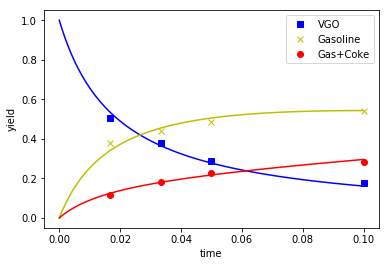

In [23]:
plt.plot(xaxisData, yaxisData[0, :], 'bs')
plt.plot(xaxisData, yaxisData[1, :], 'yx')
plt.plot(xaxisData, yaxisData[2, :], 'ro')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 0], 'b-')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 1], 'y-')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 2], 'r-')
plt.legend(['VGO', 'Gasoline','Gas+Coke'])
plt.xlabel('time')
plt.ylabel('yield')

plt.show()

#### Figure 2: Displays the weight fraction of each species verses time

### Printing the results for parameter estimation

In [24]:
print('The value for k1 is:',parametersoln[0])
print('The value for k2 is:',parametersoln[1])
print('The value for k3 is:',parametersoln[2])

The value for k1 is: 38.86498002432836
The value for k2 is: 1.8439244823182603
The value for k3 is: 13.231517861666077


## End of Documentation